Learning Objectives
After completing this lesson you will be able to:
1. Create a feed-forward regression model in Keras
2. Evaluate a feed-forward regression model in Keras

Steps
In this lesson, we will:
1. Import necessary libraries
2. Load and process the data
3. Build a feed-forward regression model with an appropriate output layer and loss function
4. Evaluate the model using regression metrics

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [2]:
# Learning history plotting function
def plot_history(history):
#Takes a keras model learning history and plots each metric"""

    metrics = history.history.keys()

    for metric in metrics:
        if not 'val' in metric:
            plt.plot(history.history[f'{metric}'], label=f'{metric}')

            if f'val_{metric}' in metrics:
                plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')

            plt.legend()
            plt.title(f'{metric}')
            plt.show()

### Load and Preprocess the Data  
The data we will be using for this model is hosted by the University of Irvine Machine Learning Repository. According to the original
paper that presented the data:
"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous
attributes." (Quinlan, 1993)
The data contains both continuous and discrete (categorical) features. Since the categories are numeric, Pandas will import them as
integer types, but we will one-hot encode them.\

In [3]:
# import data

path = r"C:\Users\User\github_projects\Machine_Learning_with_Python\datasets\auto-mpg.csv"

df_reg = pd.read_csv(path)

# drop car name columns

df_reg = df_reg.drop(columns='car name')

df_reg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
# check missing values and duplicates
print('missing values', df_reg.info())
print('\nduplicated rows', df_reg.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB
missing values None

duplicated rows 0


In [5]:
# split data

X = df_reg.drop(columns='mpg')
y = df_reg['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# preprocess the data

# transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# lists of columns for transformer
cat_cols = ['cylinders','model year','origin']
num_cols = X_train.columns.drop(cat_cols)

# column transformer
preprocessor = make_column_transformer((ohe, cat_cols), (scaler, num_cols))

# process the data
preprocessor.fit(X_train, y_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

X_train_proc.shape

c:\Users\User\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(294, 25)

#### Build and Train the Model  
We will set the input dimensions to the number of columns in our processed data so Keras can construct an implicit input layer. We will
then construct a fairly small model with two hidden layers and 10 nodes in each layer.
Since this is a regression model the final layer should have one node and a linear activation function.

In [6]:
# create model architecture
input_dim = X_train_proc.shape[1]

reg_model = Sequential()

reg_model.add(Dense(10, input_dim=input_dim, activation='relu'))
reg_model.add(Dense(10, activation='relu'))
reg_model.add(Dense(1, activation='linear'))

reg_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                260       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 381 (1.49 KB)
Trainable params: 381 (1.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Loss
Next we compile the model. We need to be sure to use a regression metric for the loss function. A loss function must always decrease
as the model error decreases. For this reason, for instance, R2 would not work as a loss function, since it increases as the model
learns.
Most deep learning regression models will use MSE as the loss function.

#### Optimizer
Optimizers are optional but can speed up learning. The ‘Adam’ optimizer is a popular one for all model types that use gradient descent
for learning.
If you want to know more, you can refer to the documentation. https://keras.io/api/optimizers/

#### Metrics
We can, optionally, add a list of metrics to our compile call and the model will keep track of how those metrics change in each epoch.
Some metrics are accessible as string shortcuts, such as ‘mae’, but others must be instantiated as metrics classes, like:
metrics.MeanAbsoluteError()
This is different from Sci-kit Learn. In Sci-kit learn we used functions to return metrics, but in Keras it expects classes that are
instantiated for each model. This is because behind the scenes these class instances will be fit on the specific data so they can make
calculations more quickly. Tensorflow is all about efficiency! The history of these metrics for each epoch will be stored in a dictionary
returned by the .fit() method.
A list of available metrics can be found at: https://keras.io/api/metrics/

In [7]:
# compile model with additional metrics

reg_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [ ]:
# Next, we fit the model and save the learning history. We will set the verbosity to 0 to avoid the long, epoch by epoch output, but you can
# change that if you like to see the numbers go by during training.

In [8]:
history = reg_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)

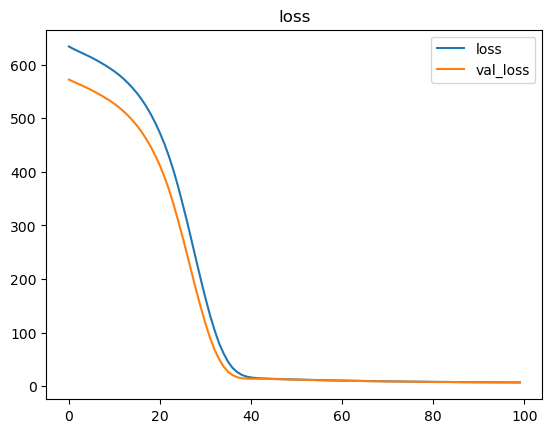

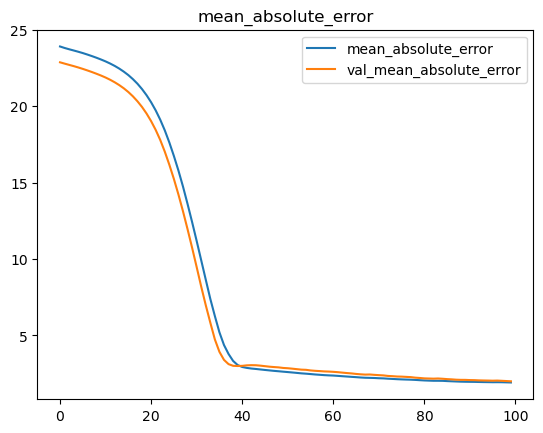

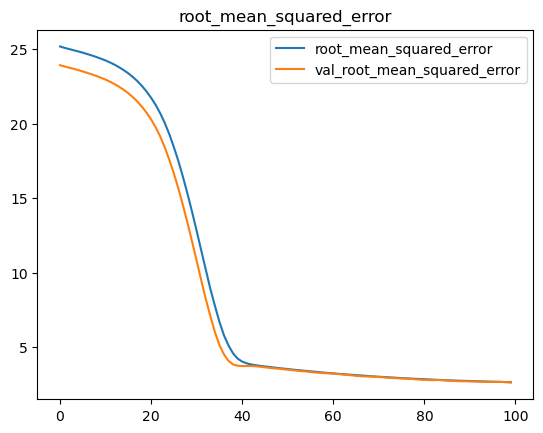

In [9]:
# We can plot the learning history for the loss function as well as all of the metrics we asked the model to keep track #of in the .compile()
# call. These are all stored in the history dictionary.

# plot learning

plot_history(history)

This model has a nice hockey-stick-shaped learning curve and the final training and testing scores are very similar. It does not seem to
suffer from overfitting or underfitting. However, let’s check the metrics directly using Sci-kit learn metrics functions to get some solid
numbers.
Evaluating a final regression model in Keras is very similar to evaluating a more traditional Sci-kit Learn model.

In [10]:
# evaluate model

y_pred = reg_model.predict(X_test_proc)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

# The R2 score shows us that our model is explaining about 87% of the variance in the target, the mean absolute error shows us that our
# model tends to make an error of about 2 miles per gallon, and since the root mean squared error is significantly higher than the mean
# absolute error, this shows us that it has made some larger errors on some samples.

4/4 [==============================] - 0s 2ms/step
final RMSE: 2.6190123765192306
final MAE: 1.9916151436007754
final R2: 0.8639936041413978


#### Summary
When constructing a deep learning model for regression it’s important to have the right output layer, loss function, and metrics. The
output layer should have one node and use a linear activation. The loss function should be MSE or another regression metric that
reduces as the model improves. You can also add more metrics to track during learning in the .compile() call by instantiating metric
class instances. The final evaluation of a deep learning model is very similar to the final evaluation of a traditional Sci-kit Learn model
and you can use the same functions from the sklearn.metrics package.